Install and import packages

In [6]:
#%pip install opencv-python
#%pip install scikit-image
#%pip install matplotlib

import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern


## Task 1: SIFT vs ORB for Keypoint Detection
### Load and Preprocess Image
Use OpenCV to read and preprocess images. Convert images to grayscale where necessary
using cv2.imread().

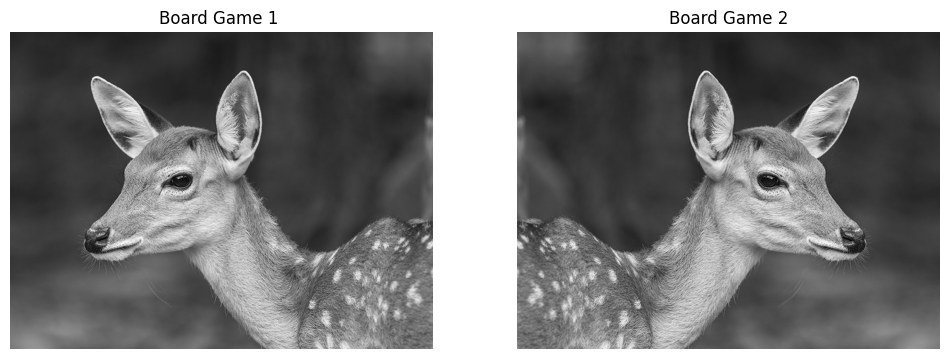

In [55]:
# Function to load an image as grayscale.
def load_grayscale_img(image_path):
    # Read image as grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Ensure the image is loaded
    if img is None:
        print("Error: Unable to load image.")
        return
    else:
        return img

# Load images        
board_game1 = load_grayscale_img('Data/Deer.jpg')
board_game2 = load_grayscale_img('Data/deer_flipped.jpg')


# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(board_game1, cmap='gray')
plt.title(f'Board Game 1 ')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(board_game2, cmap='gray')
plt.title(f'Board Game 2')
plt.axis('off')

plt.show()

### Apply SIFT
Use OpenCV’s cv2.SIFT_create() to detect keypoints and extract descriptors.
### Apply ORB
Use OpenCV’s cv2.ORB_create() to detect keypoints and extract descriptors.
### Feature Matching with SIFT and ORB
Use the Brute-Force Matcher (cv2.BFMatcher) to match descriptors and compare results.

In [ ]:
def detect_and_draw_keypoints(img):
    # Load the image in grayscale
    #img = load_grayscale_img(image_path)
    
    # Initialize SIFT, ORB, BFMatcher
    sift = cv2.SIFT_create()
    orb = cv2.ORB_create()
    #matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Detect keypoints and compute descriptors
    sift_keypoints, sift_descriptors = sift.detectAndCompute(img, None)
    orb_keypoints, orb_descriptors = orb.detectAndCompute(img, None)
    
    # Draw keypoints on the image
    img_sift = cv2.drawKeypoints(img, sift_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img_orb = cv2.drawKeypoints(img, orb_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_sift, cmap='gray')
    plt.title(f'SIFT Keypoints: {len(sift_keypoints)}')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(img_orb, cmap='gray')
    plt.title(f'ORB Keypoints: {len(orb_keypoints)}')
    plt.axis('off')
    
    plt.show()
    
    return [orb_keypoints, orb_descriptors], [sift_keypoints, sift_descriptors]



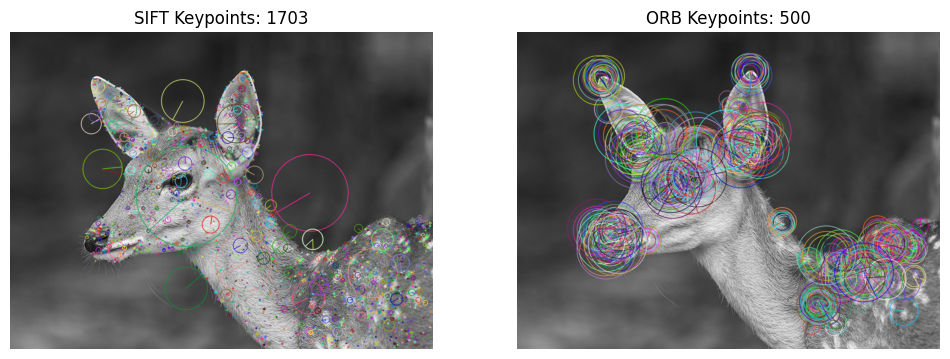

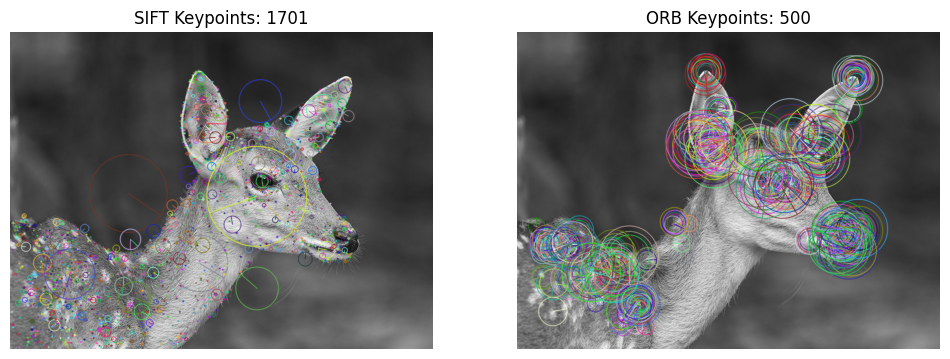

In [59]:
# Example usage (replace 'image.jpg' with your image path)
orb1, sift1 = detect_and_draw_keypoints(board_game1)
orb2, sift2 = detect_and_draw_keypoints(board_game2)

### Brute Force Match

In [67]:
def bf_match(img1, img2,x1, x2, graph_title='Top 10 matching features'):
    # create BFMatcher object
    bf = cv2.BFMatcher(crossCheck=True)

    # Match descriptors.
    matches = bf.match(x1[1],x2[1])

    # Sort them in the order of their distance.
    #matches = sorted(matches, key = lambda x:x.distance)

    # Draw first 10 matches.
    img3 = cv2.drawMatches(img1,x1[0],img2,x2[0],matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 1, 1)
    plt.imshow(img3)
    plt.title(graph_title)
    plt.axis('off')

    plt.show()
    

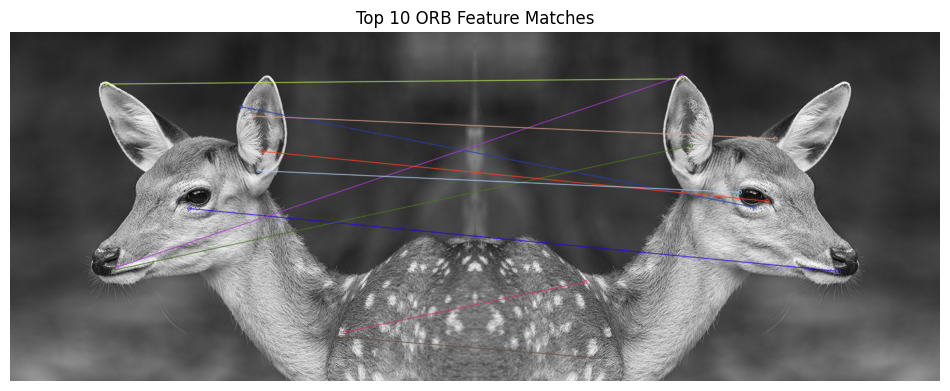

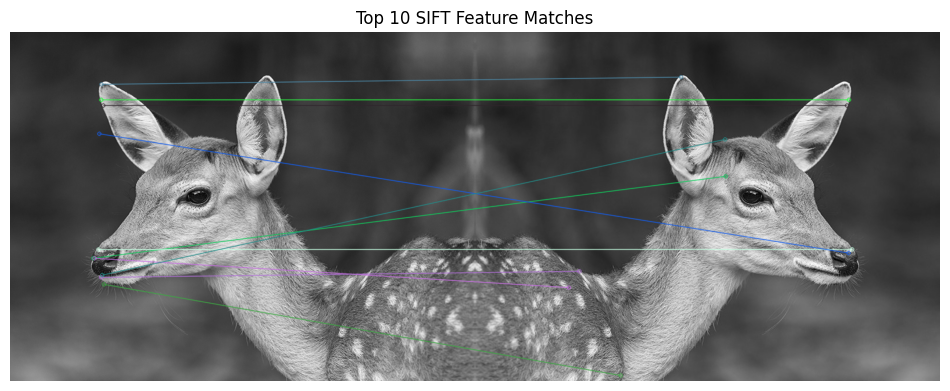

In [68]:
bf_match(board_game1, board_game2, orb1, orb2, 'Top 10 ORB Feature Matches')
bf_match(board_game1, board_game2, sift1, sift2, 'Top 10 SIFT Feature Matches')

# ANALYSIS OF STUFF ABOVE

GLCM Features: {'contrast': array([1.25156446e-05]), 'dissimilarity': array([1.25156446e-05]), 'homogeneity': array([0.99999374]), 'ASM': array([0.99997497]), 'energy': array([0.99998748]), 'correlation': array([-6.25786144e-06])}


c:\Users\I27645\AI_688_Midterm\.conda\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


LBP Histogram: [0.04539375 0.02932083 0.01985625 0.01206875 0.00881667 0.00825625
 0.00882083 0.01025417 0.01257708 0.01578958 0.01972708 0.02486458
 0.02688333 0.02527083 0.01974792 0.01567917 0.012225   0.01007083
 0.00828125 0.00813542 0.00907708 0.01312292 0.021075   0.02843542
 0.05156458 0.53468542]


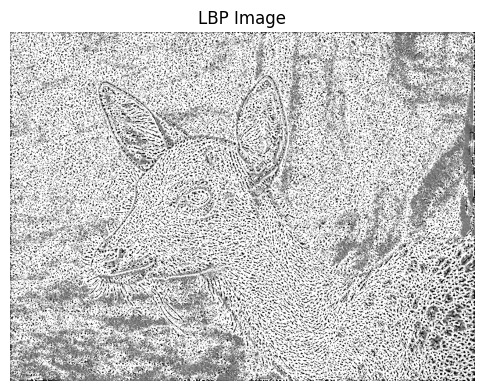

The LBP method shows the texture and shading(?) of the deer fur. we can see the fine hairs in the deers ears and whiskers under the chin, and  how the texture gently changes around the eyes.

This method is also revealing more details about the background. The original image's background was blurred, but in the LBP texture image, we can see vertical lines that I believe are trees.


## GLCM

(np.float64(-0.5), np.float64(383.5), np.float64(302.5), np.float64(-0.5))

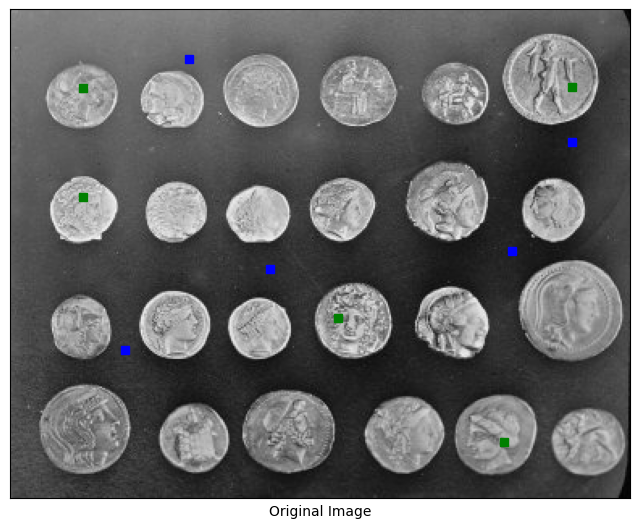

In [132]:
from skimage import data


PATCH_SIZE = 21

# open the camera image
image = data.coins()

# select some patches from coiny areas of the image
coin_locations = [(257, 295), (38, 34), (180, 192), (105, 34), (37, 337)]
coin_patches = []
for loc in coin_locations:
    coin_patches.append(
        image[loc[0] : loc[0] + PATCH_SIZE, loc[1] : loc[1] + PATCH_SIZE]
    )

# select some patches from background areas of the image
background_locations = [(200, 60), (139, 300), (71, 337), (20, 100), (150, 150,)]
background_patches = []
for loc in background_locations:
    background_patches.append(
        image[loc[0] : loc[0] + PATCH_SIZE, loc[1] : loc[1] + PATCH_SIZE]
    )

fig = plt.figure(figsize=(8, 8))
# display original image with locations of patches
ax = fig.add_subplot(1, 1, 1)
ax.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)
for y, x in coin_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for y, x in background_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')


C:\Users\I27645\AppData\Local\Temp\ipykernel_9276\3369763057.py:48: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


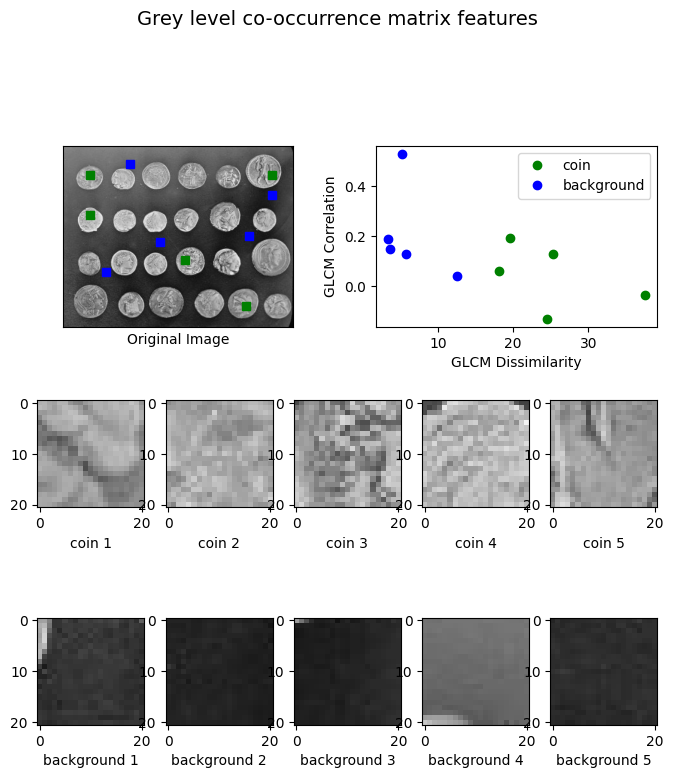

In [133]:
# compute some GLCM properties each patch
xs = []
ys = []
for patch in coin_patches + background_patches:
    glcm = graycomatrix(
        patch, distances=[5], angles=[0], levels=256, symmetric=True, normed=True
    )
    xs.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(graycoprops(glcm, 'correlation')[0, 0])

# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)
for y, x in coin_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for y, x in background_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[: len(coin_patches)], ys[: len(coin_patches)], 'go', label='coin')
ax.plot(xs[len(coin_patches) :], ys[len(coin_patches) :], 'bo', label='background')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(coin_patches):
    ax = fig.add_subplot(3, len(coin_patches), len(coin_patches) * 1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
    ax.set_xlabel(f"coin {i + 1}")

for i, patch in enumerate(background_patches):
    ax = fig.add_subplot(3, len(background_patches), len(background_patches) * 2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
    ax.set_xlabel(f"background {i + 1}")


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()